In [1]:
import pandas as pd
from estimator import RecursiveClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

8


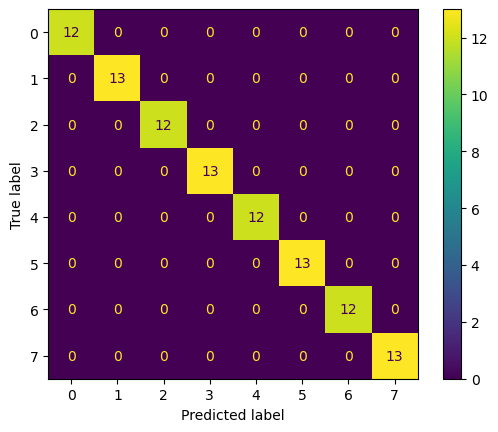

In [5]:
n_samples = 100
n_features = 5000
centers = 8
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)
components_size = 10
kmeans_n_clusters = 3
estimator = RecursiveClustering(components_size=components_size, random_state=random_state, kmeans_n_clusters=kmeans_n_clusters)
labels = estimator.fit_predict(X)
print(estimator.n_clusters_)
labels_true = pd.Series(y)
labels_pred = pd.Series(labels)
y_true = labels_true.factorize()[0]
y_pred = labels_pred.factorize()[0]
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()